## EXERCISE 2; PYTHON AND VISUALIZATION

Importing raw data

In [ ]:
import pandas as pd
import io
from google.colab import files

In [ ]:
uploaded = files.upload()
df_events = pd.read_csv(io.BytesIO(uploaded['ecommerce_event.csv']))

Saving ecommerce_event.csv to ecommerce_event.csv


In [ ]:
uploaded_2 = files.upload()
df_user = pd.read_csv(io.BytesIO(uploaded_2['user_profile.csv']))

Saving user_profile.csv to user_profile.csv


In [ ]:
df_events.head()

In [ ]:
df_user.head()

Importing numpy library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Question 1. Compare the revenue for each category using bar chart, sorted by highest revenue

In [ ]:
df_events_filter =df_events.loc[df_events['event_type'] == 'purchase']
df_events_agg = df_events_filter.groupby('category', as_index = False).agg(revenue = ('price', 'sum'))
df_events_sort =df_events_agg.sort_values('revenue', ascending= False)

Text(0.5, 1.0, 'revenue by category')

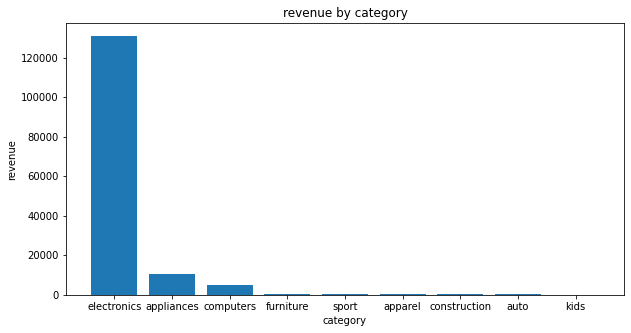

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_events_sort['category'], df_events_sort['revenue']) 
plt.xlabel('category')
plt.ylabel('revenue')
plt.title('revenue by category')

Question 2. Compare the revenue for each brand in smartphone subcategory using bar chart

In [ ]:
df_events_filter = df_events.loc[(df_events['event_type'] == 'purchase') & (df_events['subcategory'] == 'smartphone')]
df_events_agg = df_events_filter.groupby('brand', as_index = False).agg(revenue = ('price', 'sum'))
df_events_sort =df_events_agg.sort_values('revenue')

<BarContainer object of 10 artists>

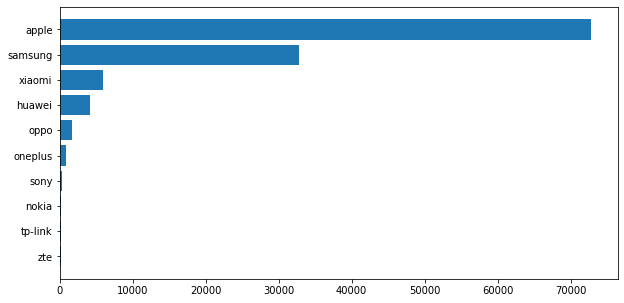

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(df_events_sort['brand'], df_events_sort['revenue'])

Question 3. Compare the total session view for each gender using bar chart, and change the color into green

In [ ]:
df_merge = pd.merge(df_events, df_user, how = 'inner', on= 'user_id')
df_merge_session =df_merge.loc[(df_merge['event_type'] == 'view')]
df_merge_session_agg = df_merge_session.groupby('gender', as_index = False).agg(num_session = ('user_session', 'nunique'))

<BarContainer object of 2 artists>

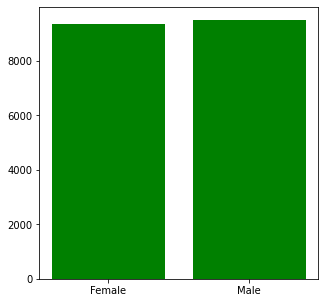

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(df_merge_session_agg['gender'], df_merge_session_agg['num_session'], color = 'g')

Question 4. Show the distribution of electronics category price using histogram

In [ ]:
df_el =df_events.loc[(df_events['category'] == 'electronics')]

(array([6176., 2397., 1378.,  940.,  342.,  293.,  173.,   56.,   23.,
          21.]), array([8.800000e-01, 2.581990e+02, 5.155180e+02, 7.728370e+02,
        1.030156e+03, 1.287475e+03, 1.544794e+03, 1.802113e+03,
        2.059432e+03, 2.316751e+03, 2.574070e+03]), <a list of 10 Patch objects>)

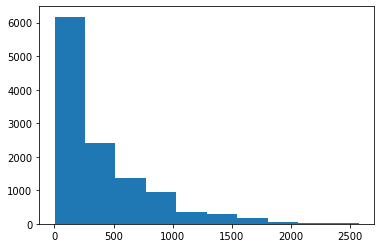

In [ ]:
plt.hist(df_el['price'])

Question 5. Show the distribution of apple price using histogram

In [ ]:
df_apple =df_events.loc[(df_events['brand'] == 'apple')]

(array([301., 548., 782., 637., 253., 277., 191.,  24.,  43.,  11.]),
 array([  22.78 ,  272.735,  522.69 ,  772.645, 1022.6  , 1272.555,
        1522.51 , 1772.465, 2022.42 , 2272.375, 2522.33 ]),
 <a list of 10 Patch objects>)

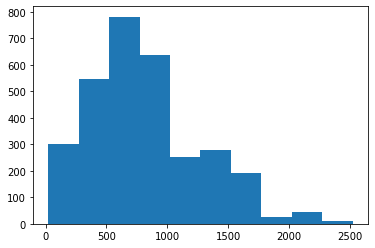

In [ ]:
plt.hist(df_apple['price'])

Question 6. Compare the price distribution from each brand in smartphone subcategory using box plot

In [ ]:
df_smartphone =df_events.loc[(df_events['subcategory'] == 'smartphone')]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


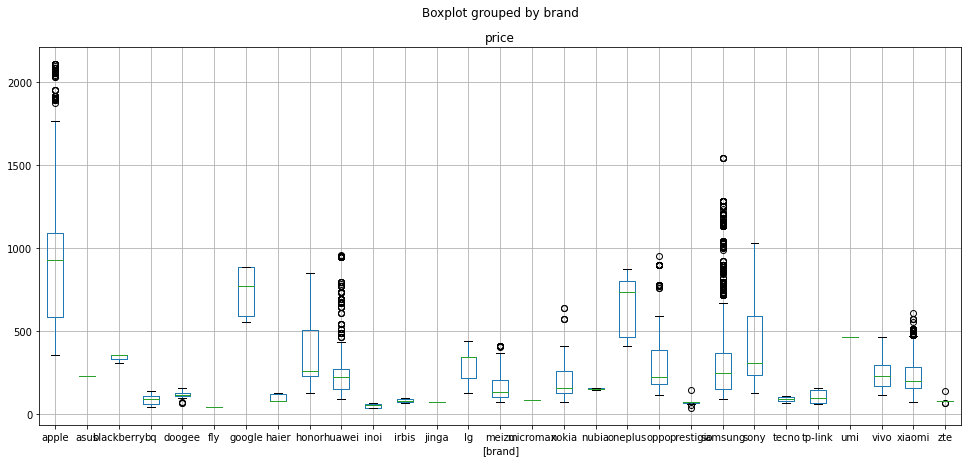

In [ ]:
df_smartphone.boxplot(column =['price'], by = ['brand'], figsize = (16,7))

Question 7. Show the relationship between age and price using scatter plot

In [ ]:
df_merge = pd.merge(df_events, df_user, how = 'inner', on= 'user_id')

Text(0.5, 1.0, 'Price and Age relation')

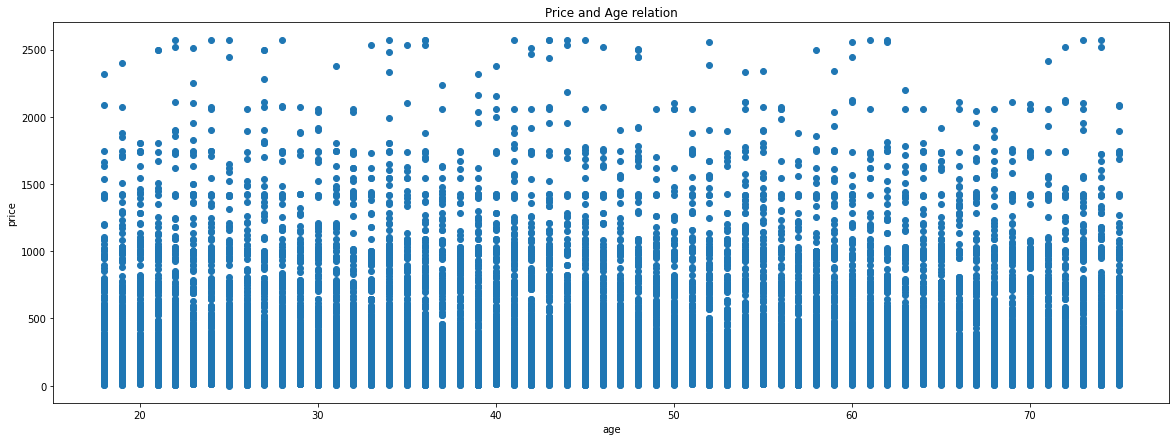

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7)) 
ax.scatter(df_merge['age'], df_merge['price'])  

ax.set_xlabel('age')    
ax.set_ylabel('price')    
ax.set_title("Price and Age relation")

Question 8. Show the conversion rate (total session purchase/total session view) per day using line chart

In [ ]:
df_purchase_daily =df_events.loc[df_events['event_type'] == 'purchase'].groupby('event_date', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_daily =df_events.loc[df_events['event_type'] == 'view'].groupby('event_date', as_index = False).agg(num_session_view = ('user_session', 'nunique'))

df_merge_daily = pd.merge(df_purchase_daily, df_view_daily,  how = 'inner', on= 'event_date').sort_values('event_date')

df_merge_daily['conversion_rate'] = df_merge_daily['num_session_purchase']/df_merge_daily['num_session_view']

Text(0.5, 1.0, 'Daily conversion rate')

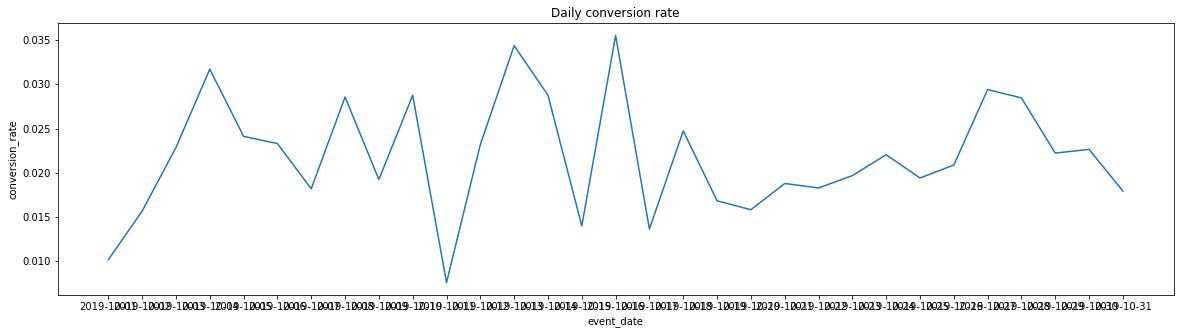

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5)) 
ax.plot(df_merge_daily['event_date'], df_merge_daily['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Daily conversion rate") 

Question 9. Show the top category with highest conversion rate (total purchase/total view) all time

In [ ]:
df_purchase_cat =df_events.loc[df_events['event_type'] == 'purchase'].groupby('category', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_cat =df_events.loc[df_events['event_type'] == 'view'].groupby('category', as_index = False).agg(num_session_view = ('user_session', 'nunique'))

df_merge_cat = pd.merge(df_purchase_cat, df_view_cat,  how = 'inner', on= 'category').sort_values('category')

df_merge_cat['conversion_rate'] = df_merge_cat['num_session_purchase']/df_merge_cat['num_session_view']

Text(0.5, 1.0, 'Category conversion rate')

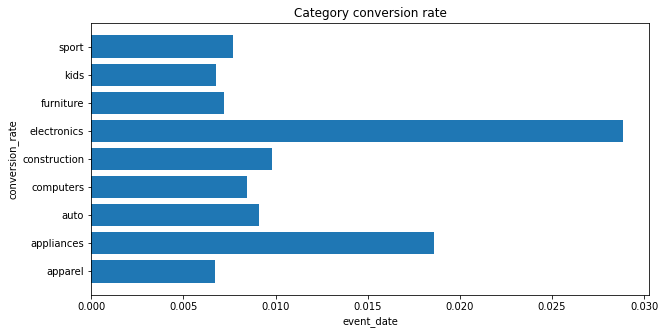

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_cat['category'], df_merge_cat['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Category conversion rate")

Question 10. Show the top brand in smartphone subcategory with highest conversion rate (total purchase/total view) all time

In [ ]:
df_purchase_brand =df_events.loc[(df_events['subcategory'] == 'smartphone') & (df_events['event_type'] == 'purchase')].groupby('brand', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_brand =df_events.loc[(df_events['subcategory'] == 'smartphone') & (df_events['event_type'] == 'view')].groupby('brand', as_index = False).agg(num_session_view = ('user_session', 'nunique'))

df_merge_brand = pd.merge(df_purchase_brand, df_view_brand,  how = 'inner', on= 'brand').sort_values('brand')

df_merge_brand['conversion_rate'] = df_merge_brand['num_session_purchase']/df_merge_brand['num_session_view']

Text(0.5, 1.0, 'Brand conversion rate')

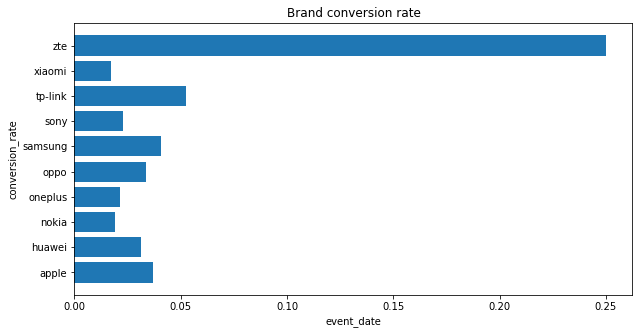

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_brand['brand'], df_merge_brand['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Brand conversion rate")